# Project :– Student Performance Prediction

## Objective
Predict student final scores based on study-related and socio-economic factors.

**Type:** Supervised – Regression

## Importing required modules, library, models, and evaluation metrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("student_habits_performance.csv")
print("✅ Dataset Loaded Successfully")
df.head()


✅ Dataset Loaded Successfully


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               100

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### Data Cleaning 

In [5]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df.dropna()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


### Encoding Categorical Features

In [7]:
cat_cols = df.select_dtypes(include='object').columns.drop(['student_id'])

In [8]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,S1998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


## EDA

## Distribution of numeric Columns

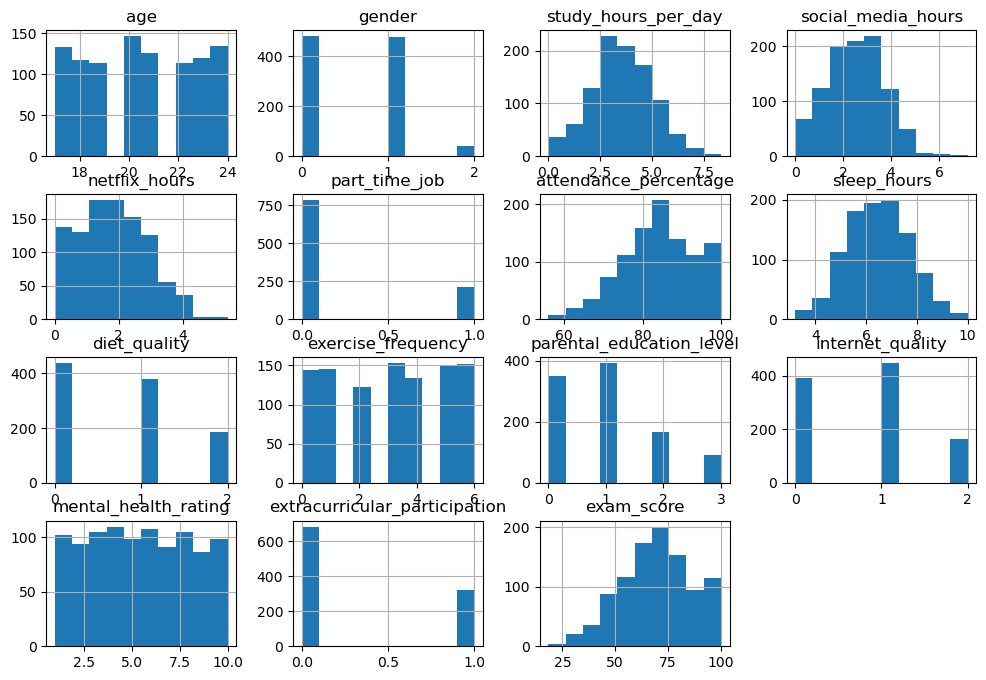

In [32]:
df.hist(figsize=(12,8),)
plt.show()

### Correlation Heatmap

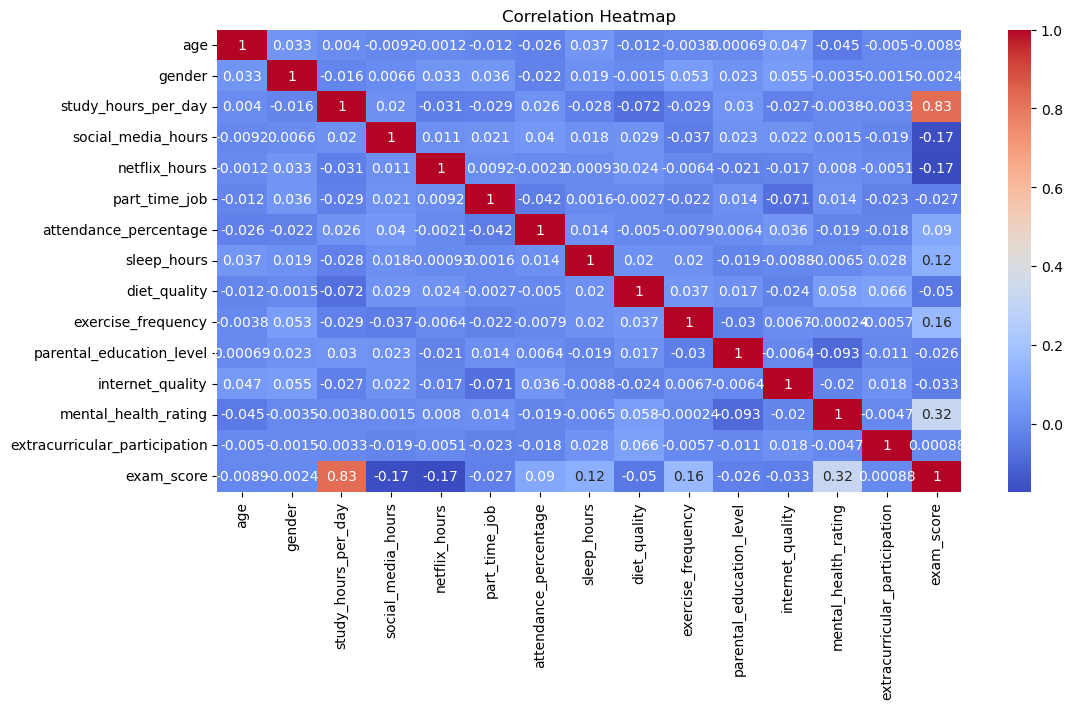

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop(['student_id'], axis= 1).corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

* High positive Correlation Columns with the Target(exam_score)
  study_hours_per_day,attendance_percentage,sleep_hours, exercise_frequency, mental_health_rating
* High negative Correlation columns with the Target(exam_score)                                     
  social_media_hours, netflix_hours, part_time_jobs
  

### Train-Test Split

In [12]:
x = df[['study_hours_per_day','attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating','social_media_hours','netflix_hours','part_time_job']]
y = df['exam_score']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Feature Scaling

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


### Building Model

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


### Model Training and Comparison

In [17]:
results = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2": score, "MAE": mae}
    


### Model Evaluation

In [18]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
results_df

,R2,MAE
Linear Regression,0.899291,4.127446
Gradient Boosting,0.878141,4.658367
Random Forest,0.855095,4.846430


### Save Model and Scaler

In [29]:
best_model_name = results_df.index[0]
best_model = models[best_model_name]

best_model.fit(x_train_scaled, y_train)

with open(f"{best_model_name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
    joblib.dump(best_model, f)

print(f"Best model '{best_model_name}' saved as joblib file.")


Best model 'Linear Regression' saved as joblib file.


In [30]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Insights

* The analysis reveals that academic performance is shaped by a balanced combination of study habits, lifestyle factors, and behavioral patterns. Key drivers include consistent study schedules, healthy sleep routines, lower screen-time, and strong attendance.
* School or coaching institutes can use such models to identify
  at-risk students early and provide targeted support.
